In [ ]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt



In [ ]:
# task 1
def toggle_ode(t, y, alpha, beta, n):
    u, v = y
    du_dt = alpha / (1.0 + v**n) - u
    dv_dt = beta  / (1.0 + u**n) - v
    return [du_dt, dv_dt]


In [ ]:
# task 2
alpha = 5.0
beta  = 5.0
n     = 4.0

t_span = (0.0, 50.0)
t_eval = np.linspace(t_span[0], t_span[1], 1001)

y0_highU = [4.0, 0.0]
y0_highV = [0.0, 4.0]

sol_highU = solve_ivp(toggle_ode, t_span, y0_highU, args=(alpha, beta, n), t_eval=t_eval, rtol=1e-8, atol=1e-10)
sol_highV = solve_ivp(toggle_ode, t_span, y0_highV, args=(alpha, beta, n), t_eval=t_eval, rtol=1e-8, atol=1e-10)


u_highU, v_highU = sol_highU.y
u_highV, v_highV = sol_highV.y
u_highU, v_highU , u_highV, v_highV


(array([4.        , 4.04877058, 4.09516258, ..., 4.99999998, 4.99999998,
        4.99999998]),
 array([0.        , 0.00092588, 0.00176425, ..., 0.00798722, 0.00798722,
        0.00798722]),
 array([0.        , 0.00092588, 0.00176425, ..., 0.00798722, 0.00798722,
        0.00798722]),
 array([4.        , 4.04877058, 4.09516258, ..., 4.99999998, 4.99999998,
        4.99999998]))

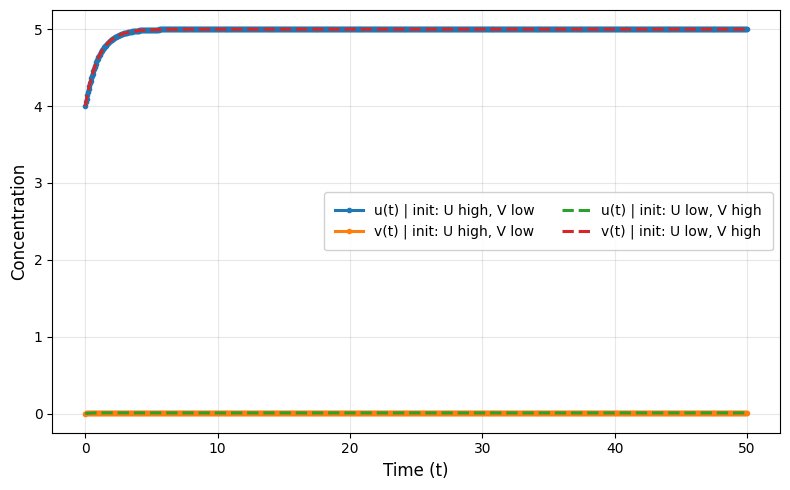

In [19]:
# task 3
plt.figure(figsize=(8, 5))

plt.plot(sol_highU.t, u_highU, marker='.', label='u(t) | init: U high, V low', linewidth=2.2)
plt.plot(sol_highU.t, v_highU, marker='.', label='v(t) | init: U high, V low', linewidth=2.2)

plt.plot(sol_highV.t, u_highV, label='u(t) | init: U low, V high', linewidth=2.2, linestyle='--')
plt.plot(sol_highV.t, v_highV, label='v(t) | init: U low, V high', linewidth=2.2, linestyle='--')

plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('Concentration', fontsize=12)

plt.legend(ncol=2, frameon=True, fancybox=True, framealpha=0.9, borderpad=0.8)

plt.grid(True, which='both', alpha=0.3)

plt.tick_params(labelsize=10)
plt.tight_layout()
plt.show()




## Task 4
1.两组不同的初始条件分别会趋向并最终停留在不同的稳定状态。 
2.由于相互抑制和非线性（Hill 系数 (n>1)）的存在，系统具有两个稳定平衡点，分别对应“U 开 / V 关”与“U 关 / V 开”。因此称之为双稳态开关。  
3.两种稳定状态的生物学含义：稳态 A：(u) 高、(v) 低 —— U 基因 ON，V 基因 OFF；稳态 B：(u) 低、(v) 高 —— U 基因 OFF，V 基因 ON。  